In [1]:
from sklearn.linear_model import ElasticNet, Lasso,BayesianRidge, LassoLarsIC, LinearRegression, RidgeCV, \
LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pylab 
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

### EDA

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

In [3]:
df_test.dtypes[df_test.dtypes != 'object'].index
# train.dtypes[train.dtypes != 'object'].index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [4]:
df_test.set_index("Id")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


In [5]:
def missing_values(df):
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
# percentage_isnull = 100 * train_df.isnull().sum()/len(train_df)
# mis_val_table = pd.concat([percentage_isnull], axis=1)
# mis_val_table

missing_values(df_train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


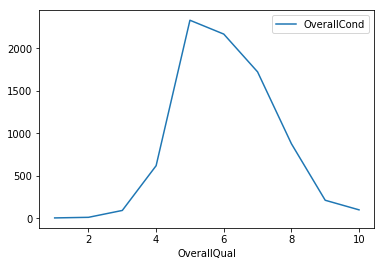

In [6]:
overall = df_train.groupby('OverallQual')['OverallCond'].agg({'OverallCond': 'sum'}).plot()


Text(0, 0.5, 'No. of Houses Built')

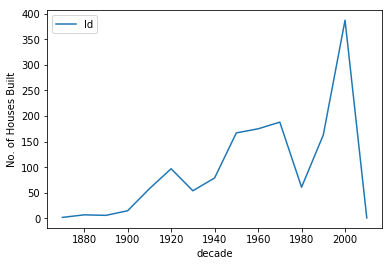

In [7]:
df_train['decade'] = 10 * (df_train['YearBuilt']// 10)
df_train.pivot_table('Id',index = 'decade', aggfunc = 'count').plot()
plt.ylabel('No. of Houses Built')


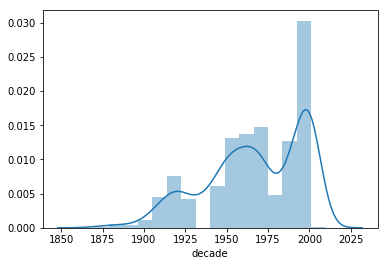

In [8]:
#probability of a house being built per decade
sns.distplot(df_train.decade)

In [9]:
#trying to find a corelation between saleprice, yearbuilt and overalcondition

df_train.groupby('decade')[['SalePrice', 'OverallCond']].agg({'SalePrice': ['count','median'], 'OverallCond': 'median'})

#Although overall condition were built between 1880-1970, houses built after 2010 have the highest market price


SalePrice         OverallCond
           count  median      median
decade                              
1870           2  108000         6.5
1880           7  124000         7.0
1890           6  142200         7.0
1900          15  127000         7.0
1910          58  128750         6.0
1920          97  115000         6.0
1930          54  126500         6.0
1940          79  122900         6.0
1950         167  136000         6.0
1960         175  146000         5.0
1970         188  147500         6.0
1980          61  178000         5.0
1990         163  204000         5.0
2000         387  223500         5.0
2010           1  394432         2.0

In [10]:
# We only have one one house for this group (small sample size), so our mean is not necessarily
# indicative of the mean of the houses built in 2010
df_train[df_train.decade == 2010].OverallCond

378    2
Name: OverallCond, dtype: int64

## Data Cleaning

In [11]:
#Function for fillna with 'None'. Same function can be used to fillna with 0 for binary columns
#Assign the lists want to change to a list named (eg.na_cols) and pass it in the function.


na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish',
           'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
          "MasVnrType",'MSSubClass', ] 

def fill_all_with_none(df, col_list):
    """Function that takes a list of column names as strings
    and mutates the dataframe by replacing NA values with the
    string "None"
    
    Arguments:
    ==========
    df: the dataframe to replace NAs
    col_list: list of column names as strings
    
    Return:
    ==========

    None (mutates dataframe)
    """
    
    # replace NA with "None"
    for col in col_list:
        df[col].fillna('None', inplace = True)

fill_all_with_none(df_train, na_cols)


#median for LotFrontage
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In [12]:
#Ordinal categorical features numerical-type ### Nominal to Numerical


df_train['ExterQual'] = df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['ExterCond'] = df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtQual'] = df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtCond'] = df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['HeatingQC'] = df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['FireplaceQu'] = df_train['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageQual'] = df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageCond'] = df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['PoolQC'] = df_train['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_train['Fence'] = df_train['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})


In [13]:
#Fill NAs with 0

print(df_train.Electrical.mode())
df_train['Electrical'] = df_train.Electrical.fillna(df_train.Electrical.mode()[0])
df_train['GarageYrBlt'] = df_train.GarageYrBlt.fillna(0)

0    SBrkr
dtype: object


In [14]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

### Transforming the SalePrice Column

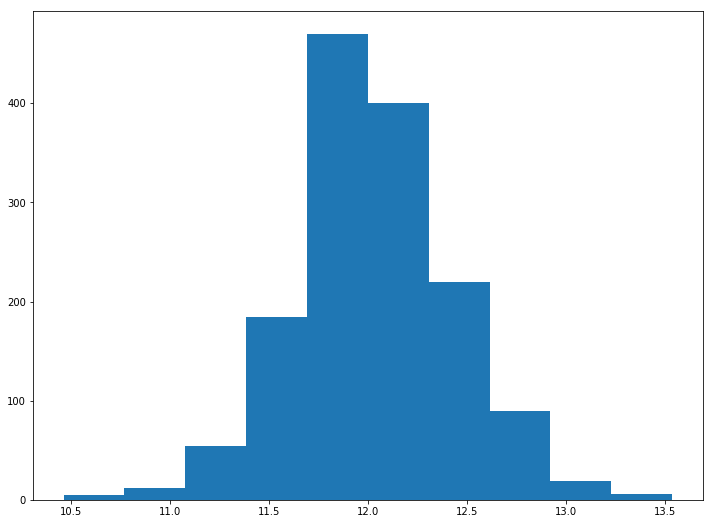

In [15]:
plt.figure(figsize=(12,9))
plt.hist(np.log(df_train.SalePrice))

#When training model use log_SalePrice as y(target) and remove SalePrice from X(otherwise data leakage)
df_train['log_SalePrice'] = np.log(df_train['SalePrice'])
#df_train.drop('SalePrice', inplace = True, axis = 1)

## Removing Outliers

In [16]:
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
#Another way of doing the same thing
#train.select_dtypes(include=['int', 'float'])
numeric_feats = numeric_feats[~numeric_feats.isin(['SalePrice', 'log_SalePrice', 'Id'])]
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'decade'],
      dtype='object')

### Outliers choice based on visualization

In [17]:
# outlier_feats = {}

# #Plot these features against log_SalePrice
# %matplotlib inline

# for feat in numeric_feats:
#     plt.figure()
#     plt.scatter(df_train[feat], df_train['log_SalePrice'])
#     plt.show()
#     outlier_feats[feat] = input('Does {} feature have outliers?'.format(feat))


# outliers_list = []

# for key in outlier_feats:
#     if outlier_feats[key] in ['yes', 'Yes']:
#         outliers_list.append(key)

# for feat in outliers_list:
#     plt.figure()
#     plt.scatter(df_train[feat], df_train['log_SalePrice'])
#     plt.xlabel(feat)
#     plt.show()


#Final list of outliers printed here, so we won't have ot rerun it everytine we start the kernel

outliers_list = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea']

In [18]:
#For columns with continuous data
#Function to identify the outliners (numbers can be 2-3-4)

outlier_df = df_train[outliers_list]
df_train = df_train.loc[outlier_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
df_train.shape

(1418, 83)

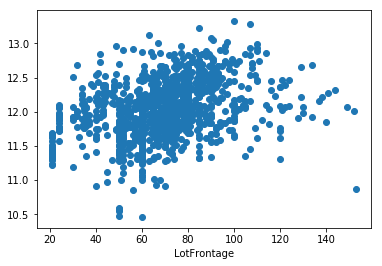

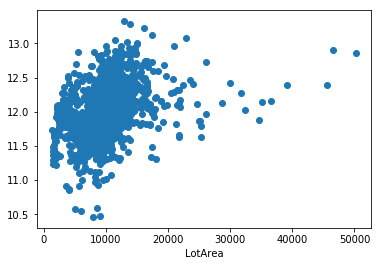

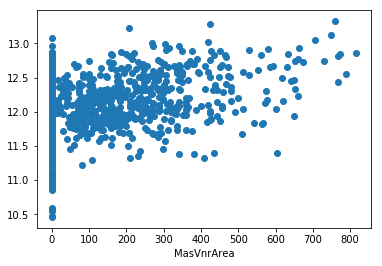

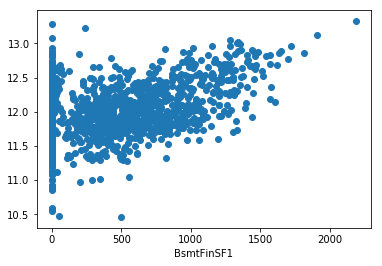

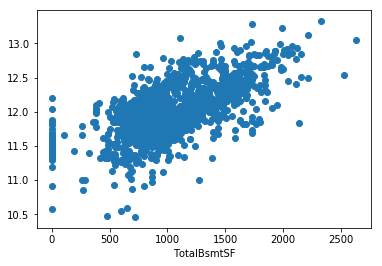

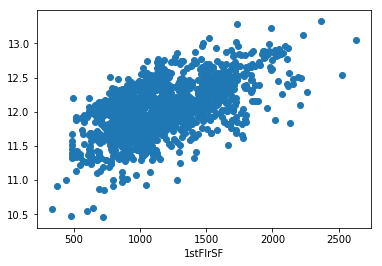

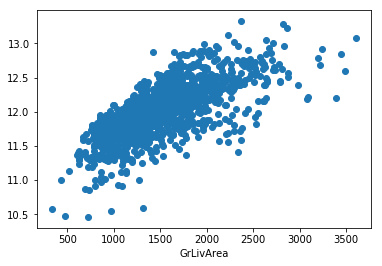

In [19]:
for feat in outliers_list:
    plt.figure()
    plt.scatter(df_train[feat], df_train['log_SalePrice'])
    plt.xlabel(feat)
    plt.show()

In [20]:
# Do this for columns with continuous data
# We found our outlier columns, they are in outliers_list
#Function to identify the outliners (numbers can be 2-3-4)

outlier_df = df_train[outliers_list]
df_train = df_train.loc[outlier_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]

## Correlation

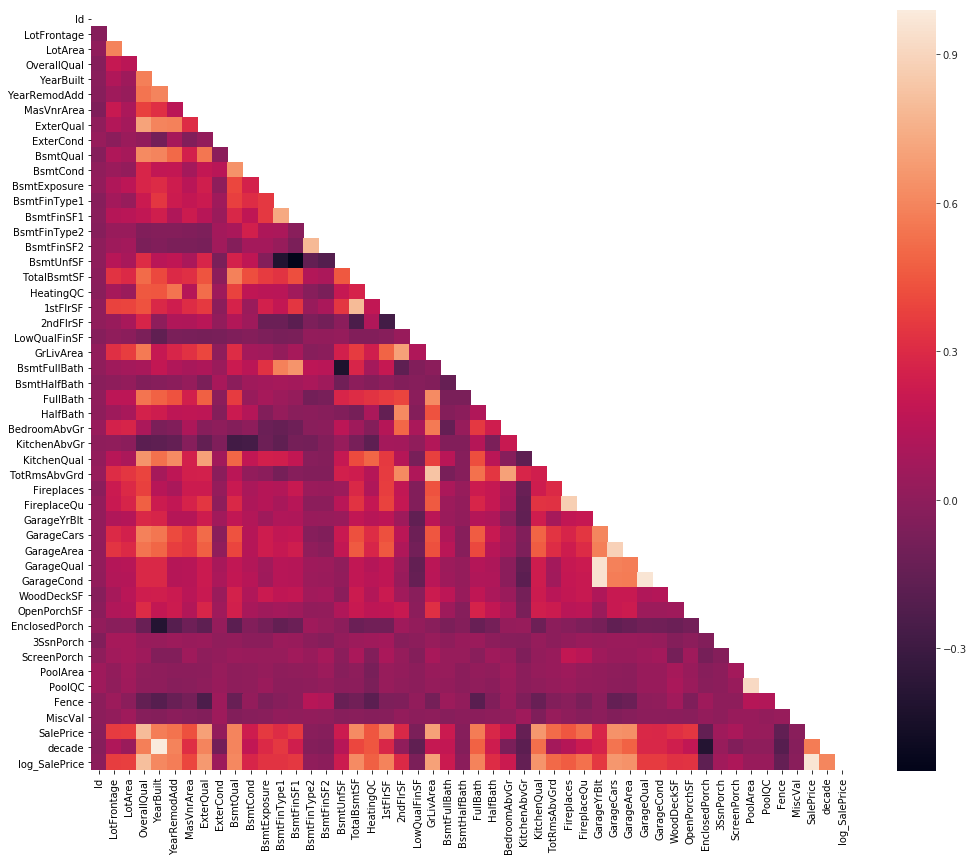

In [21]:
df_train[df_train.columns[1:]].corr()['SalePrice']

corrmap = df_train.corr()
plt.subplots(figsize=(17,14))

mask = np.zeros_like(corrmap)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corrmap, mask=mask, vmax=0.99, square=True)


In [22]:
#select features with correlation of >=0.3

In [23]:
high_corr_features = corrmap.log_SalePrice[abs(corrmap.log_SalePrice) >= .3].index.tolist()

In [25]:
###Add total square footage
df_train['TotalSF']=df_train['TotalBsmtSF']+df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*df_train['HalfBath'] + \
0.5*df_train['BsmtHalfBath']

### Dummifying

In [26]:
#df_train.set_index('Id', inplace=True)
df_train = pd.get_dummies(df_train, drop_first=True)

In [27]:
### Drop Id and Utilities column before feature selection and modeling
df_train = df_train.drop('Id', axis = 1)
df_train = df_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath','HalfBath','BsmtHalfBath','MasVnrArea'], axis=1)

# Modeling

### Multiple Linear Regression

In [28]:
from sklearn import linear_model, model_selection
ols = linear_model.LinearRegression()

In [29]:
feature = df_train.drop(columns=['SalePrice', 'log_SalePrice'], axis = 1)
target = df_train['log_SalePrice']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(feature, target, test_size=0.33, random_state = 42)

ols.fit(X_train, y_train)
#print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0/The intercept is %.3f " + str(np.round(ols.intercept_, 3)))
print("Train RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print("Train R^2: %.5f" % ols.score(X_train, y_train))
print("Test RSS: %.2f" %np.sum((ols.predict(X_test) - y_test) ** 2))
print("Test R^2: %.5f" %ols.score(X_test, y_test))
print('The model score is %.3f' %(ols.score(X_train, y_train)))

trainRMSE = np.sqrt(mean_squared_error(y_train, ols.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, ols.predict(X_test)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print()
print(pd.Series(ols.coef_, index=X_train.columns).sort_values(ascending=False))




beta_0/The intercept is %.3f 4.254
Train RSS: 6.01
Train R^2: 0.95593
Test RSS: 9.39
Test R^2: 0.85057
The model score is 0.956
Train RMSE: 0.080
Test RMSE: 0.143

MSZoning_FV              0.541735
MiscFeature_Othr         0.519748
MSZoning_RH              0.503954
MSZoning_RL              0.491904
MSZoning_RM              0.471142
OverallCond_2            0.350770
RoofStyle_Shed           0.343724
GarageType_None          0.341640
GarageFinish_None        0.341640
MiscFeature_None         0.298866
GarageType_Basment       0.294485
GarageType_Detchd        0.258901
GarageType_BuiltIn       0.254973
GarageType_Attchd        0.254358
MiscFeature_Shed         0.249877
SaleType_CWD             0.245176
Exterior1st_Stone        0.243167
Exterior1st_BrkFace      0.226674
SaleCondition_Partial    0.224020
OverallCond_9            0.211649
Exterior1st_Stucco       0.181102
HouseStyle_2.5Unf        0.178224
OverallCond_8            0.177651
OverallCond_7            0.170929
Exterior1st_MetalSd 

In [42]:
import statsmodels.api as sm
x=sm.add_constant(feature)
model = sm.OLS(target,x)
results=model.fit()
print(results.summary())
pValues= results.pvalues
print('The insignificant coefficients')
pValues[pValues>0.05].sort_values(ascending=False)

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     86.22
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:38:58   Log-Likelihood:                 1324.8
No. Observations:                1392   AIC:                            -2226.
Df Residuals:                    1180   BIC:                            -1115.
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.69

MiscFeature_Shed        0.998921
GarageCond              0.998174
MiscFeature_None        0.995146
GarageFinish_None       0.991244
GarageType_None         0.991244
Exterior1st_AsphShn     0.989053
MoSold_3                0.987746
Neighborhood_Somerst    0.976121
Condition2_RRAn         0.960746
MiscVal                 0.960206
LowQualFinSF            0.959597
Exterior1st_WdShing     0.958031
Exterior2nd_BrkFace     0.953715
Condition1_RRNe         0.949849
MoSold_9                0.945429
GarageFinish_RFn        0.944142
ExterQual               0.943641
Exterior2nd_MetalSd     0.935807
MiscFeature_Othr        0.928368
SaleType_ConLw          0.923996
Neighborhood_NPkVill    0.921356
MoSold_2                0.913781
Exterior1st_Stone       0.907670
Exterior1st_Plywood     0.900709
MoSold_11               0.893694
SaleCondition_Family    0.890614
HouseStyle_SLvl         0.888976
Exterior1st_VinylSd     0.888495
Neighborhood_Blueste    0.881991
Alley_Pave              0.879297
          

## Penalized Regression
### Ridge

In [31]:
ridgcv = RidgeCV(alphas=[.001, .01, .1, 1, 2, 5, 10, 12, 14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
ridgcv.fit(X_train,y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridgcv.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridgcv.predict(X_test)))

print('The best alpha is %.6f' %(ridgcv.alpha_))
print('The ridge intercept is %.2f' %(ridgcv.intercept_))
print(pd.Series(abs(ridgcv.coef_), index=X_train.columns).sort_values())
print('The model score is: %.2f' %(ridgcv.score(X_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The best alpha is 10.000000
The ridge intercept is 4.70
Functional_Sev           0.000000
RoofMatl_Metal           0.000000
Exterior1st_AsphShn      0.000000
Electrical_Mix           0.000000
Exterior1st_CBlock       0.000000
Condition2_PosA          0.000000
Exterior2nd_CBlock       0.000000
LotArea                  0.000008
LowQualFinSF             0.000010
MiscVal                  0.000013
OpenPorchSF              0.000014
BsmtFinSF2               0.000018
BsmtFinSF1               0.000023
3SsnPorch                0.000024
BsmtUnfSF                0.000028
GarageYrBlt              0.000035
Exterior1st_ImStucc      0.000035
PoolArea                 0.000057
GarageArea               0.000063
WoodDeckSF               0.000108
GrLivArea                0.000121
TotalSF                  0.000124
Foundation_CBlock        0.000172
EnclosedPorch            0.000177
ScreenPorch              0.000177
Exterior2nd_CmentBd      0.000272
Exterior1st_CemntBd      0.000272
SaleType_WD              0

### Lasso

In [32]:
lassocv = LassoCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
lassocv.fit(X_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, lassocv.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_test,lassocv.predict(X_test)))

print('The best alpha is: %.6f' %(lassocv.alpha_))
print('The lasso intercept is: %.2f' %(lassocv.intercept_))
print(pd.Series(lassocv.coef_, index=X_train.columns))
print('The model score is: %.2f' %(lassocv.score(X_train, y_train)))

print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE)) 
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))


The best alpha is: 0.001000
The lasso intercept is: 4.47
LotFrontage              0.000456
LotArea                  0.000008
OverallQual              0.056546
YearBuilt                0.005358
YearRemodAdd             0.000977
ExterQual                0.018359
ExterCond                0.000007
BsmtQual                -0.000000
BsmtCond                -0.000000
BsmtExposure             0.009167
BsmtFinType1             0.003549
BsmtFinSF1               0.000154
BsmtFinType2            -0.000000
BsmtFinSF2               0.000133
BsmtUnfSF                0.000093
HeatingQC                0.012127
LowQualFinSF            -0.000153
GrLivArea                0.000252
BedroomAbvGr            -0.010212
KitchenAbvGr            -0.047757
KitchenQual              0.011568
TotRmsAbvGrd             0.005360
Fireplaces               0.002268
FireplaceQu              0.010973
GarageYrBlt              0.000009
GarageCars               0.004654
GarageArea               0.000110
GarageQual               

In [52]:
enet = ElasticNetCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
enet.fit(X_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=enet.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=enet.predict(X_test)))

print('The best alpha is %.6f' %(enet.alpha_)) 
print('The elastic-net intercept is %.2f' %(enet.intercept_))
print('The model score is %.2f' %(enet.score(X_train, y_train)))
print(pd.Series(enet.coef_, index=X_train.columns))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.2f' %((testRMSE - trainRMSE)))


The best alpha is 0.001000
The elastic-net intercept is 12.89
The model score is 0.94
MSSubClass              -0.000272
LotFrontage              0.000305
LotArea                  0.000008
OverallQual              0.049057
OverallCond              0.046328
YearBuilt                0.004564
YearRemodAdd             0.000556
ExterQual                0.003283
ExterCond               -0.000000
BsmtQual                 0.003434
BsmtCond                -0.007016
BsmtExposure             0.012989
BsmtFinType1             0.005387
BsmtFinSF1               0.000165
BsmtFinType2            -0.001584
BsmtFinSF2               0.000157
BsmtUnfSF                0.000098
HeatingQC                0.009000
LowQualFinSF            -0.000109
GrLivArea                0.000280
BedroomAbvGr            -0.014121
KitchenAbvGr            -0.036195
KitchenQual              0.007329
TotRmsAbvGrd             0.009093
Fireplaces               0.006639
FireplaceQu              0.008339
GarageYrBlt             -0.000

## Random Forest

In [54]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=10,max_features=0.5, \
                           min_samples_split=2, min_samples_leaf=1,n_jobs=-1, \
                           random_state=111)

rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train, y_train, cv=10)
print(scores.mean())

trainRMSE = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('The model score is %.2f' %(rf.score(X_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE) )
print('Diff in RMSE: %.3f' %((testRMSE - trainRMSE)))

0.880584921817454
The model score is 0.98
Train RMSE: 0.057
Test RMSE: 0.145
Diff in RMSE: 0.089


## Gradient Boosting 

In [56]:
gbst = GradientBoostingRegressor(alpha=0.2, n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =111)

n_estimators = 50100
gbst.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbst.fit(X_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, gbst.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, gbst.predict(X_test)))

print('The model score is %.2f' %(gbst.score(X_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.96
Train RMSE: 0.078
Test RMSE: 0.181
Diff in RMSE: 0.103


## Xgboost

In [57]:
import xgboost
### Initial Pass
xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=10.5, reg_lambda=0.3, gamma=0.01,
                           silent=1, random_state =7, nthread = -1) 
xgb.fit(X_train, y_train, verbose=False)
### Make Predictions 
trainRMSE = np.sqrt(mean_squared_error(y_train, xgb.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))

print('The model score is %.2f' %(xgb.score(X_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.88
Train RMSE: 0.135
Test RMSE: 0.164
Diff in RMSE: 0.029


## Lightgbm

In [59]:
from lightgbm import LGBMRegressor
import lightgbm 
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.001, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(x_train, y_train)


trainRMSE = np.sqrt(mean_squared_error(y_train, lgb.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, lgb.predict(x_test)))

print('The model score is %.3f' %(lgb.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

ModuleNotFoundError: No module named 'lightgbm'